In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-04-07 07:07:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.159.128, 142.251.161.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  78.7MB/s    in 0.8s    

2023-04-07 07:07:18 (78.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [4]:
try:
    os.mkdir('/cats_and_dogs_filtered')
    os.mkdir('/tmp/cats_and_dogs_filtered/training')
    os.mkdir('/tmp/cats_and_dogs_filtered/validation')
    os.mkdir('/tmp/cats_and_dogs_filtered/train/cats')
    os.mkdir('/tmp/cats_and_dogs_filtered/train/dogs')
    os.mkdir('/tmp/cats_and_dogs_filtered/validation/cats')
    os.mkdir('/tmp/cats_and_dogs_filtered/validation/dogs')
except OSError:
    pass

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [7]:
import os
pasta = '/tmp/cats_and_dogs_filtered/train/dogs'
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        print(os.path.join(diretorio, arquivo))

/tmp/cats_and_dogs_filtered/train/dogs/dog.55.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.391.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.102.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.211.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.257.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.12.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.300.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.105.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.368.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.531.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.716.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.866.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.267.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.961.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.911.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.993.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.332.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.737.jpg
/tmp/cats_and_dogs_filtered/train/dogs/dog.196.jpg
/tmp/cats_and_dogs_filtered/train

In [9]:
import cv2
from google.colab.patches import cv2_imshow
imagem = cv2.imread("/tmp/cats_and_dogs_filtered/train/dogs/dog.90.jpg")

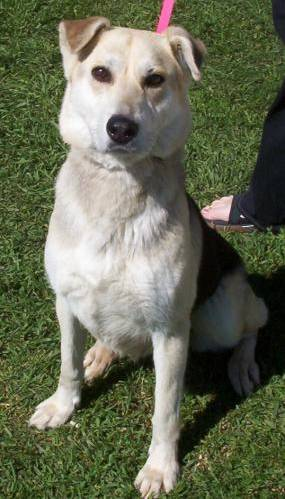

In [10]:
cv2_imshow(imagem)

In [11]:
imagem.shape

(499, 285, 3)

In [12]:
type(imagem)

numpy.ndarray

In [15]:
cv2.rectangle(imagem.copy(), (1, 100), (150, 360), 2, 2)

array([[[ 21,  62,  41],
        [ 41,  82,  61],
        [ 11,  52,  31],
        ...,
        [ 39,  27,  27],
        [ 37,  27,  27],
        [ 38,  28,  28]],

       [[ 32,  73,  52],
        [ 54,  95,  74],
        [ 23,  64,  43],
        ...,
        [ 40,  28,  28],
        [ 38,  28,  28],
        [ 39,  29,  29]],

       [[ 49,  90,  69],
        [ 71, 112,  91],
        [ 36,  77,  56],
        ...,
        [ 42,  30,  30],
        [ 39,  29,  29],
        [ 41,  31,  31]],

       ...,

       [[ 58, 110,  87],
        [ 31,  80,  58],
        [ 27,  72,  53],
        ...,
        [ 32,  70,  52],
        [ 22,  60,  42],
        [ 18,  54,  38]],

       [[ 60, 118,  93],
        [ 38,  95,  70],
        [ 38,  84,  65],
        ...,
        [ 33,  72,  51],
        [ 20,  59,  38],
        [ 16,  50,  33]],

       [[ 57, 115,  90],
        [ 43, 100,  75],
        [ 41,  87,  68],
        ...,
        [ 34,  73,  52],
        [ 19,  58,  37],
        [ 12,  46,  29]]

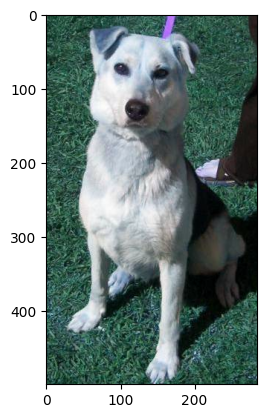

In [16]:
plt.imshow(imagem.copy())

In [19]:
def bancoimg(self, k):
    path = '/tmp/cats_and_dogs_filtered/train/dogs'
    files = [f for f in listdir(path)]
    for file in files:
        imagem = cv2.imread(f'/tmp/cats_and_dogs_filtered/train/dogs/{file}')
        #cv2.imshow(f"{file}", imagem)
        ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
        ss.setBaseImage(imagem)
        ss.switchToSelectiveSearchFast()
        retangulos = ss.process()
        retangulos_aleatorios = retangulos[np.random.randint(low = 0, high = retangulos.shape[0], size = k),]
        output = imagem.copy()

        lista=[]
        for (a, b, c, d) in retangulos_aleatorios:
            if b != 0 and d != 0:
                try:
                    output = cv2.resize(output[a:a+b,c:c+d], (150, 150))
                    lista.append(output)
                except:
                      pass

        return lista #len=k

In [55]:
def bancoimg(imagem, k):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(imagem)
    ss.switchToSelectiveSearchFast()
    retangulos = ss.process()
    retangulos_aleatorios = retangulos[np.random.randint(low = 0, high = retangulos.shape[0], size = k),]
    output = imagem.copy()

    lista=[]
    for (a, b, c, d) in retangulos_aleatorios:

        if b != 0 and d != 0:
            try:
                output = cv2.resize(output[a:a+b,c:c+d], (150, 150))
                lista.append(output)
            except:
                pass

    return lista #len=k

In [123]:
ss_rects = bancoimg(imagem, 3)

In [125]:
print(ss_rects[0].shape)

(150, 150, 3)


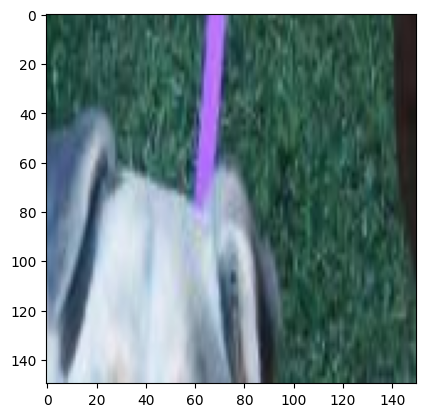

In [126]:
plt.imshow(ss_rects[0])

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [95]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=10, steps_per_epoch=90,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/10
90/90 [==============================] - 39s 438ms/step - loss: 0.6706 - acc: 0.6078 - val_loss: 0.6407 - val_acc: 0.6667
Epoch 2/10
90/90 [==============================] - 39s 435ms/step - loss: 0.6023 - acc: 0.6728 - val_loss: 0.7194 - val_acc: 0.5667
Epoch 3/10
90/90 [==============================] - 38s 426ms/step - loss: 0.5699 - acc: 0.7033 - val_loss: 0.6539 - val_acc: 0.6500
Epoch 4/10
90/90 [==============================] - 38s 416ms/step - loss: 0.5185 - acc: 0.7439 - val_loss: 0.6037 - val_acc: 0.6500
Epoch 5/10
90/90 [==============================] - 39s 429ms/step - loss: 0.4652 - acc: 0.7828 - val_loss: 0.5989 - val_acc: 0.6917
Epoch 6/10
90/90 [==============================] - 38s 424ms/step - loss: 0.4071 - acc: 0.8150 - val_loss: 0.6122 - val_acc: 0.7083
Epoch 7/10
90/90 [==============================] - 39s 432ms/step - loss: 0.3501 - acc: 0.8561 - val_loss: 0.7169 - val_acc: 0.6417
Epoch 8/10
90/90 [==============================] - 39s 429ms/step - 

<Figure size 640x480 with 0 Axes>

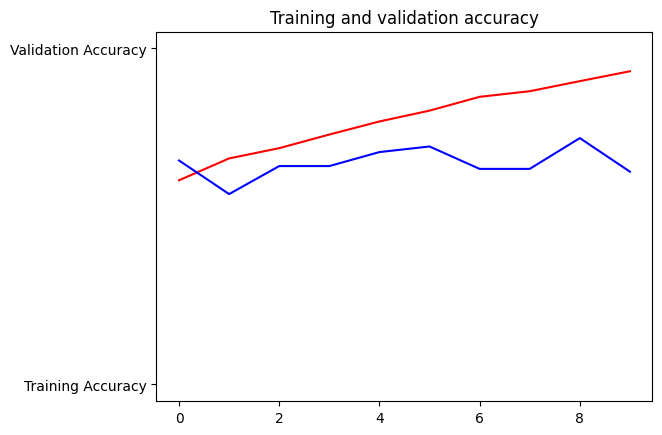

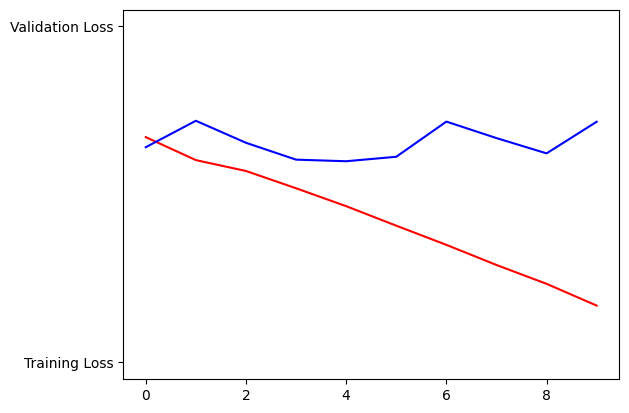

<Figure size 640x480 with 0 Axes>

In [97]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

Aqui apresentou graficamente a evolução da loss e acuracia ao longo das epocas, para treino e teste.

In [127]:
classes = []
for rect in ss_rects:
   classes.append(model.predict(rect.reshape((1,150,150,3)), batch_size=150))

1/1 [==============================] - 0s 26ms/step


In [121]:
x = np.reshape(classes, (len(classes), 1))
print(x)

[[1.000000e+00]
 [2.218157e-15]
 [0.000000e+00]]


[[0.]]
[[1.]]


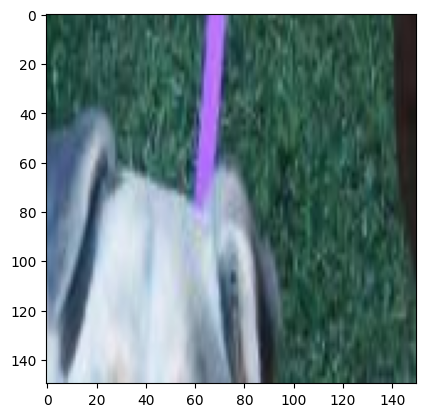

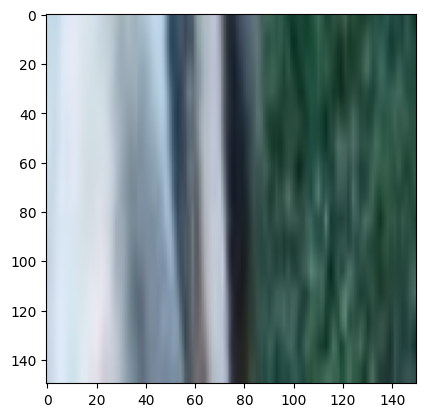

<Figure size 640x480 with 0 Axes>

In [129]:
for index in range(0, len(ss_rects)):
    rect = ss_rects[index]
    classe = classes[index]
    plt.imshow(rect)
    print(classe)
    plt.figure()

In [134]:
import cv2
from google.colab.patches import cv2_imshow
imagem = cv2.imread("/tmp/cats_and_dogs_filtered/train/cats/cat.50.jpg")

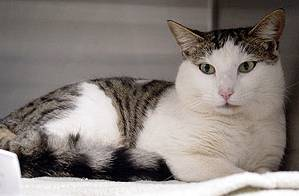

In [135]:
cv2_imshow(imagem)

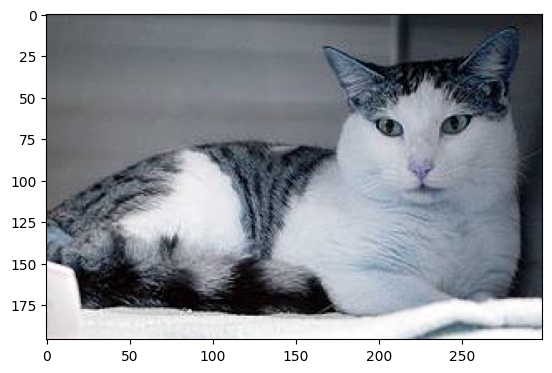

In [136]:
plt.imshow(imagem.copy())

In [137]:
ss_rects = bancoimg(imagem, 3)

In [138]:
classes = []
for rect in ss_rects:
    classes.append(model.predict(rect.reshape((1,150,150,3)), batch_size=150))

1/1 [==============================] - 0s 27ms/step


[[1.]]
[[1.]]


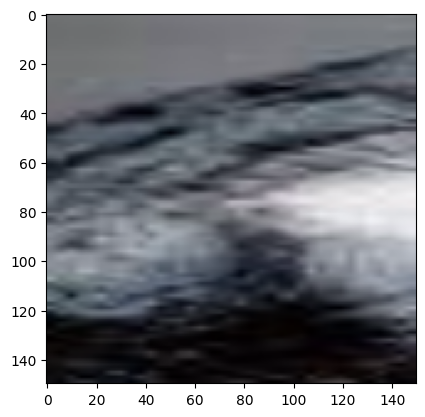

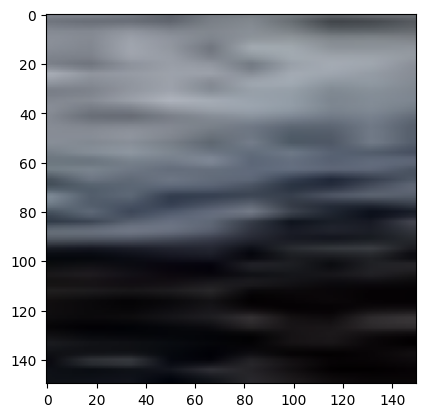

<Figure size 640x480 with 0 Axes>

In [139]:
for index in range(0, len(ss_rects)):
    rect = ss_rects[index]
    classe = classes[index]
    plt.imshow(rect)
    print(classe)
    plt.figure()

A rede foi treinada com o database de imagens disponibilizadas pelo desafio do kaggle https://www.kaggle.com/c/dogs-vs-cats .
Fiz um modelo um pouco parecido com a Fast RCNN, onde a rede é treinada com as imagens originais e após isso é aplicado o Selective Search.
O retorno da rede é basicamente a probabilidade da bounding box gerada pelo selective search conter um objeto nela.
Fiz 2 testes, ambos gerando 2 bounding boxes cada. 2 para gato e 2 para cachorro. Apesar de ser um teste pequeno, podemos ver que o resultado ficou bem parecido com a acuracia de teste(Treino - acc: 0.9028, Teste - val_acc: 0.7333), como mostra no teste ali em cima, gato: acertou 100%, cachorro: acertou 50%, totalizando 75% de acuracia.

Apesar da val_loss se distoar bastante da loss, acredito que o modelo não está overfittando, pois segundo o teste apresentado acima, a acuracia está muito proxima da val_acc.

Qualquer duvida, fico a disposição. Obrigado.